In [5]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
# import and set up paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(0, '../scripts')
from utils_1 import (missing_values_table,find_agg,plot_bar,plot_box,plot_box_multi,plot_count,
                    convert_bytes_to_megabytes,fix_outlier,plot_hist,plot_heatmap,plot_scatter,
                    percent_missing,fill_na
                    )
from sklearn.preprocessing import MinMaxScaler
from plots import plots_visual
# import warnings
# warnings.filterwarnings('ignore')

In [6]:
# import and set up paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(1, '../scripts')

In [7]:
data=pd.read_csv('../data/Week1_challenge_data_source(CSV).csv')
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [8]:
# get categorical features
df_cat=data.select_dtypes(include=['object'])
df_cat.isnull().sum()

Start                      1
End                        1
Last Location Name      1153
Handset Manufacturer     572
Handset Type             572
dtype: int64

In [9]:
# determining missing values
missing_values_table(df_cat)
percent_missing(df_cat) # percetange is not high we can drop nan valures

Your selected dataframe has 5 columns.
There are 5 columns that have missing values.
The  dataset contains 0.31 % missing values.


In [10]:
df_cat

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F
1,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...,...
149996,4/29/2019 7:28,4/30/2019 6:02,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,4/29/2019 7:28,4/30/2019 10:41,D10223C,Apple,Apple iPhone Se (A1723)
149998,4/29/2019 7:28,4/30/2019 10:46,T51102A,Apple,Apple iPhone Xs (A2097)
149999,4/29/2019 7:28,4/30/2019 10:40,L88342B,Huawei,Huawei Fig-Lx1


In [11]:
df_cat.dropna(axis=0, inplace=True)
df_cat.isnull().sum()

Start                   0
End                     0
Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64

In [12]:
df_cat.dtypes

Start                   object
End                     object
Last Location Name      object
Handset Manufacturer    object
Handset Type            object
dtype: object

In [13]:
# convert Start' and 'End' objects  to time 
df_cat['Start_time'] = pd.to_datetime(df_cat['Start'], errors='coerce')
df_cat['End_time'] = pd.to_datetime(df_cat['End'], errors='coerce')

In [14]:
df_cat.drop(['Start', 'End'], axis=1, inplace = True)

In [15]:
df_cat

,Last Location Name,Handset Manufacturer,Handset Type,Start_time,End_time
0,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,2019-04-04 12:01:00,2019-04-25 14:35:00
1,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),2019-04-09 13:04:00,2019-04-25 08:15:00
2,D42335A,Samsung,Samsung Galaxy A8 (2018),2019-04-09 17:42:00,2019-04-25 11:58:00
3,T21824A,undefined,undefined,2019-04-10 00:31:00,2019-04-25 07:36:00
4,D88865A,Samsung,Samsung Sm-G390F,2019-04-12 20:10:00,2019-04-25 10:40:00
...,...,...,...,...,...
149995,T85721A,undefined,undefined,2019-04-29 07:28:00,2019-04-30 00:01:00
149996,D20434A,Apple,Apple iPhone 8 Plus (A1897),2019-04-29 07:28:00,2019-04-30 06:02:00
149997,D10223C,Apple,Apple iPhone Se (A1723),2019-04-29 07:28:00,2019-04-30 10:41:00
149998,T51102A,Apple,Apple iPhone Xs (A2097),2019-04-29 07:28:00,2019-04-30 10:46:00


In [16]:
# get the numerical data  type features
df_num=data.select_dtypes(include=['float64'])
df_num

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,6.0,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,NaN,NaN,44.0,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,NaN,NaN,6.0,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,451.0,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,32.0,0.0,52.0,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,483.0,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,27.0,2.0,23.0,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,283.0,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,43.0,6.0,43.0,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,696.0,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,37.0,5.0,34.0,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [17]:
# determining missing values
missing_values_table(df_num)
percent_missing(df_num) # percetange is  high we can not drop nan valures 
                            #we will have to replace them with othen values

Your selected dataframe has 50 columns.
There are 36 columns that have missing values.
The  dataset contains 13.72 % missing values.


In [18]:
# fix_outliers
df_num_clean_outlier=fix_outlier(df_num, df_num.columns.to_list())
df_num_clean_outlier.isnull().sum()
df_num_clean_outlier

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,770.0,662.0,86399.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,235.0,606.0,86399.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,1.0,652.0,86399.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,6.0,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,486.0,171.0,86399.0,2.082014e+14,3.375034e+10,3.535661e+13,NaN,NaN,44.0,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,455841077.5
4,1.311448e+19,565.0,500.0,86399.0,2.082014e+14,3.369980e+10,3.540701e+13,NaN,NaN,6.0,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,451.0,214.0,81230.0,2.082015e+14,3.365069e+10,3.548311e+13,32.0,0.0,52.0,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,483.0,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,27.0,2.0,23.0,...,1.387723e+07,8.288284e+06,1.935015e+07,1.099638e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,7.349883e+18,283.0,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,43.0,6.0,43.0,...,1.161602e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,7.349883e+18,696.0,327.0,97910.0,2.082015e+14,3.361962e+10,8.618620e+13,37.0,5.0,34.0,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,4.218030e+08,1.406930e+06,29626096.0,371895920.0


In [19]:
#  fill nan with the mean
miss_num=missing_values_table(df_num_clean_outlier)

colum=miss_num[miss_num["% of Total Values"]>6.0].index
for col in colum:
    mean_value=df_num_clean_outlier[f"{col}"].mean()
    df_num_clean_outlier[f"{col}"].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
df_num_clean_outlier.dropna(axis=0, inplace=True)
df_num_clean_outlier

Your selected dataframe has 50 columns.
There are 36 columns that have missing values.
Updated Dataframe:


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,770.0,662.0,86399.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,235.0,606.0,86399.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,1.0,652.0,86399.0,2.082003e+14,3.376063e+10,3.528151e+13,55.919785,9.156037,6.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,486.0,171.0,86399.0,2.082014e+14,3.375034e+10,3.535661e+13,55.919785,9.156037,44.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,455841077.5
4,1.311448e+19,565.0,500.0,86399.0,2.082014e+14,3.369980e+10,3.540701e+13,55.919785,9.156037,6.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,615.0,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,45.000000,9.000000,63.0,...,6550499.0,18003146.0,11642217.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,451.0,214.0,81230.0,2.082015e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.0,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,483.0,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.0,...,13877234.0,8288284.0,19350146.0,10996384.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,7.349883e+18,283.0,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.0,...,11616019.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


User engagement analysis


Tracking the user engagement based on session frequency, duration of session, and total traffic (UL+DL) on the network


Aggregating the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [20]:
df_num_clean_outlier['total_data']= df_num_clean_outlier['Total DL (Bytes)'] + df_num_clean_outlier['Total UL (Bytes)']

In [21]:
df_user_engagement = df_num_clean_outlier[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'total_data']]

df_user_engagement = df_user_engagement.groupby('MSISDN/Number').agg(
    {'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'total_data': 'sum'})
df_user_engagement = df_user_engagement.rename(columns={'Bearer Id': 'XDR Sessions'})

#  top 10 customers per engagement metric - XDR sessions
df_us_en=df_user_engagement.sort_values(by='XDR Sessions', ascending=False).head(10)
# user_engagement_df.sort_values(by='total_data', ascending=False).head(3).plot(kind='hist')
df_us_en

,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,
3.366371e+10,7354,671590937.0,3.469756e+12
3.362632e+10,18,1785419.0,7.558798e+09
3.362578e+10,17,1599052.0,7.672420e+09
3.361489e+10,17,1678397.0,7.993297e+09
3.365973e+10,16,1905478.0,6.882985e+09
3.367588e+10,15,1745131.0,7.511894e+09
3.376054e+10,15,1651084.0,8.495067e+09
3.366716e+10,13,1209703.0,5.618394e+09
3.360452e+10,12,1193033.0,5.080239e+09


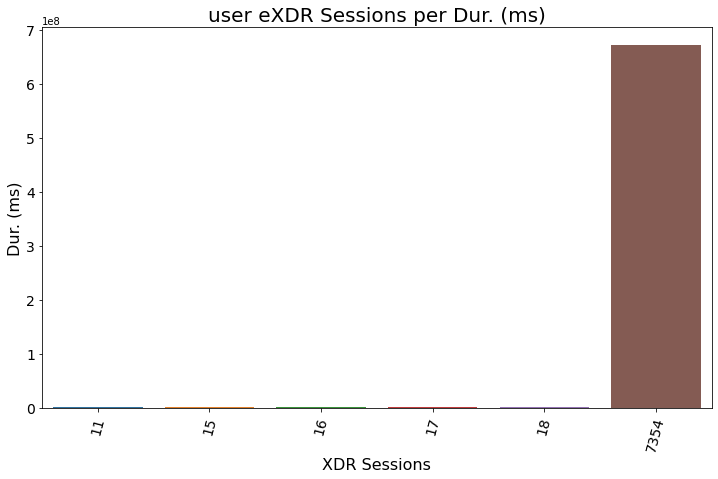

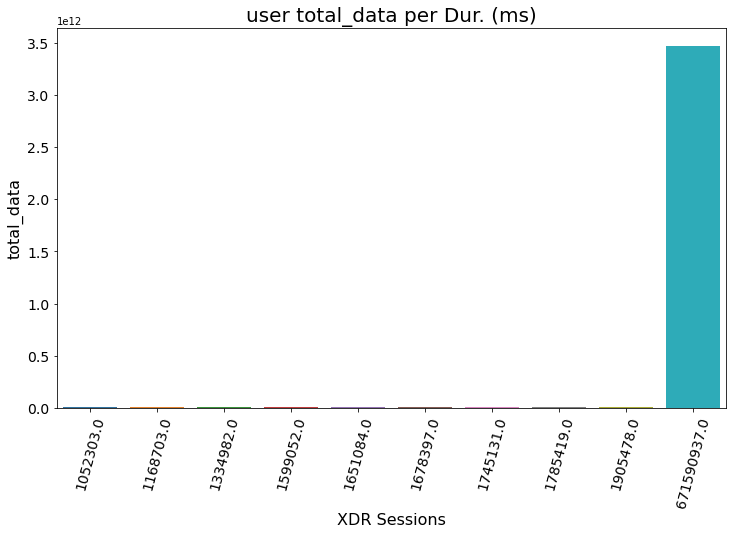

In [28]:
plot_bar(df_us_en,df_us_en['XDR Sessions'],'Dur. (ms)','user eXDR Sessions per Dur. (ms)',
'XDR Sessions','Dur. (ms)'
)
plot_bar(df_us_en,df_us_en['Dur. (ms)'],'total_data','user total_data per Dur. (ms)',
'XDR Sessions','total_data'
)


In [23]:
#  top 10 customers per engagement metric - total data volume
df_us_en=df_user_engagement.sort_values(by='total_data', ascending=False).head(10)
df_us_en

,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,
3.366371e+10,7354,671590937.0,3.469756e+12
3.376054e+10,15,1651084.0,8.495067e+09
3.361489e+10,17,1678397.0,7.993297e+09
3.362578e+10,17,1599052.0,7.672420e+09
3.362632e+10,18,1785419.0,7.558798e+09
3.367588e+10,15,1745131.0,7.511894e+09
3.365973e+10,16,1905478.0,6.882985e+09
3.366471e+10,11,1334982.0,6.437286e+09
3.366646e+10,11,1168703.0,6.140522e+09


In [24]:
df_user_engagement['XDR Sessions'].value_counts()

1       73160
2       20090
3        4113
4        1822
5         893
6         190
7          65
8          26
9          17
10          8
12          4
11          4
17          2
15          2
18          1
16          1
7354        1
13          1
Name: XDR Sessions, dtype: int64

In [25]:
# Generate plot on top 10 handsets
